<a href="https://colab.research.google.com/github/isaitw/20240806/blob/main/20230615%E4%BA%BA%E8%87%89%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

設定使用GPU：

點擊Runtime -> 點擊Change Runtime Type -> Hardware Acceleration選擇GPU

# 使用face_recognition套件

In [ ]:
!pip install face_recognition

In [ ]:
import face_recognition

# 人臉偵測

In [ ]:
image = face_recognition.load_image_file("lin.jpeg")
face_locations = face_recognition.face_locations(image)

In [ ]:
face_locations

[(217, 687, 440, 464)]

In [ ]:
x = [(1, 2, 3, 4), (4, 3, 2, 1)]

In [ ]:
x[0]

(1, 2, 3, 4)

In [ ]:
x[1]

(4, 3, 2, 1)

In [ ]:
for i in x:
  print(i)

(1, 2, 3, 4)
(4, 3, 2, 1)


In [ ]:
for i in face_locations:
  print(i)

(217, 687, 440, 464)


In [ ]:
from PIL import Image, ImageDraw
img = Image.open('lin.jpeg')
draw = ImageDraw.Draw(img)
for i in face_locations:
  top, right, bottom, left = i
  draw.rectangle((left, top, right, bottom), outline='blue', width=5)

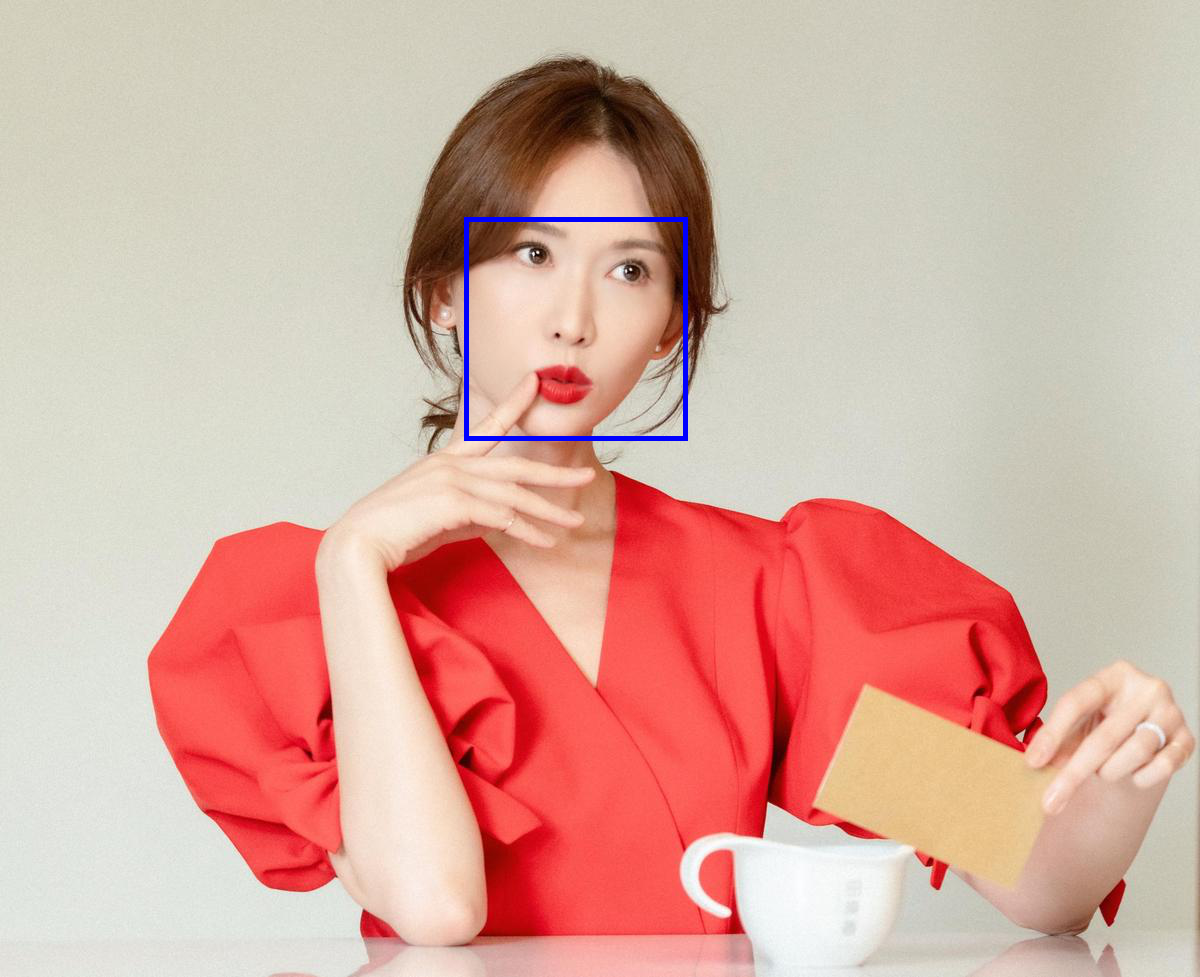

In [ ]:
img

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
def process(image):
  face_locations = face_recognition.face_locations(image)
  img = Image.fromarray(image)
  draw = ImageDraw.Draw(img)
  for i in face_locations:
    top, right, bottom, left = i
    draw.rectangle((left, top, right, bottom), outline='red', width=5)
  return img

In [ ]:
gr.Interface(process, "image", "pil").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://000f7fa3c2b5c26853.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## 收集人臉圖片

In [ ]:
def collect(image, image_name):
  image.save(image_name+'.jpg')
  return image.convert("L")

In [ ]:
gr.Interface(collect, ['pil', 'text'], 'pil').launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://508b1fc2d07baffbf0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
def detect(filename):
  image = face_recognition.load_image_file(filename)
  face_locations = face_recognition.face_locations(image)
  img = Image.fromarray(image)
  draw = ImageDraw.Draw(img)
  for i in face_locations:
    top, right, bottom, left = i
    draw.rectangle((left, top, right, bottom), outline='red', width=5)
  return img

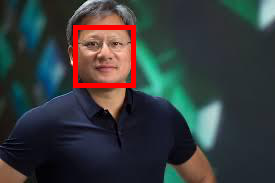

In [ ]:
detect('Huang.jpg')

## 列出所有.jpg圖片

In [ ]:
import glob

In [ ]:
filenames = glob.glob("*.jpg")

In [ ]:
filenames

['小戴.jpg',
 '大谷翔平.jpg',
 'twice.jpg',
 '小林.jpg',
 'Lisa.jpg',
 '柯瑞.jpg',
 '賴清德.jpg',
 's.jpg',
 '柯P.jpg',
 '林志玲.jpg',
 'jisoo.jpg',
 'Huang.jpg',
 '陳其邁.jpg',
 '侯友宜.jpg',
 '人.jpg']

In [ ]:
for filename in filenames:
  print(filename)

小戴.jpg
twice.jpg
Lisa.jpg
s.jpg
林志玲.jpg
jisoo.jpg
Huang.jpg
人.jpg


## 讀取人臉特徵

In [ ]:
known_faces = []
for filename in filenames:
  try:
    face = face_recognition.load_image_file(filename)
    face_encoding = face_recognition.face_encodings(face)[0]
    known_faces.append(face_encoding)
  except Exception as e:
    print(filename)

In [ ]:
known_faces[0]

## 人臉辨識

In [ ]:
import numpy as np

In [ ]:
def who(image):
  encoding = face_recognition.face_encodings(image)[0]
  x = face_recognition.face_distance(known_faces, encoding)
  filename = filenames[np.argmin(x)]
  return Image.open(filename)

In [ ]:
gr.Interface(who, 'image', 'pil').launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

# 補充資料

## YOLO

You Only Look Once!

In [ ]:
!pip install ultralytics

In [ ]:
import torch
import gradio as gr
from PIL import Image

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

def process(image):
  image = Image.fromarray(image)
  image.thumbnail((1024, 1024))
  results = model(image, augment=True)
  results.save()
  return results.ims[0]

gr.Interface(process, "image", "image").launch()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 196.3 MB/s eta 0:00:00

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2023-6-15 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 240MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>